# 데이터 전처리

In [13]:
import pandas as pd

In [14]:
original_path = "C:\Potenup\SecondHanded-Strollers-PredictedPrice\data\\raw\\daangn.csv"
csv_path = "C:\Potenup\SecondHanded-Strollers-PredictedPrice\data\\preprocessed\\daangn.csv"

In [15]:
origin_df = pd.read_csv(original_path)
origin_df.head()
df = origin_df.copy()

In [16]:
df.shape

(5836, 8)

## 결측치 확인

In [17]:
df.isna().sum()

id                  0
title               0
detail              0
condition        5497
uploaded_date       0
is_completed        0
price               0
location            0
dtype: int64

## 스토케와 관계 없는 행 삭제

In [18]:
stokke_pattern = "스토케|stokke|요요|yoyo"
not_stokke_pattern = "부가부"
not_stokke = df[~df['title'].str.contains(stokke_pattern, na=False, case=False) | df['title'].str.contains(not_stokke_pattern, na=False, case=False)]
print(not_stokke['id'].count())

282


In [19]:
df = df[df['title'].str.contains(stokke_pattern, na=False, case=False) | 
        ~df['title'].str.contains(not_stokke_pattern, na=False, case=False)]

## 나눔 제품 삭제

In [20]:
free_item = df[df['title'].str.contains("나눔", na=False)]
for row in free_item.itertuples(index=False):
    print(row.title, row.price, row.location)

❗️급처/오늘만❗️스토케 V3 디럭스 유모차 나눔합니다. 30000.0 등촌동
[나눔]디럭스유모차 100000.0 잠원동
나눔 세탁완료한 스토케 유모차 나눔합니다 20000.0 유아동
나눔?스토케유모차 100000.0 삼각동
❤️나눔❤️스토케 디럭스 유모차 300000.0 당감제4동
나눔 스토케 디럭스 유모차 100000.0 유아동
❤️나눔❤️ 스토케 디럭스 유모차 59900.0 논현1동
(나눔) 스토케 유모차커버 40000.0 역삼동
[나눔] 스토케 유모차 무료나눔합니다~ 30000.0 성사동
(나눔)스토케 유모차 무료나눔 20000.0 유아동
[나눔]스토케 유모차 블랙 20000.0 포일동
나눔 스토케 유모차 컵걸이 10000.0 삼송동
[나눔] 스토케 유모차 9000.0 덕이동
(나눔) 스토케 유모차 17000.0 도내동
나눔) 스토케 유모차 850000.0 동홍동
(나눔) 스토케 유모차 5000.0 동산동
[나눔] 스토케 유모차 50000.0 임암동
나눔) 스토케 익스플로리 디럭스 유모차 28000.0 도련일동
(나눔)스토케 익스플로리 유모차 35000.0 용산동
나눔)스토케 절충형 유모차 120000.0 암사동
[나눔] stokke 스토케 유모차 나눔합니다 75000.0 성내제3동
디럭스 스토케 유모차 나눔 1000.0 오륜동
디럭스 유모차 나눔합니다. 20000.0 염창동
디럭스 유모차 나눔해요 10000.0 유천동
롯데백화점 10%에누리 나눔해요 7400000.0 신정3동
마니또 방풍커버 나눔해요. 5000.0 유아동
맘네스트 사계절 방풍커버 나눔합니다 36000.0 작전동
명품! 유모차! 스토케 무료 나눔! 20000.0 새롬동
무료나눔 스토케유모차 9950000.0 유아동
무료나눔) 스토케 유모차 55000.0 등촌제3동
무료나눔 스토케 유모차 100000.0 정발산동
🌟무료나눔🌟 스토케 크루지 유모차 150000.0 압구정동
(문고리) 스토케 디럭스 유모차 나눔 20000.0 유아동
스토게유모차 무료나눔 1000.0 효성2동
스토케디럭스유모차

In [21]:
df = df[~df['title'].str.contains("나눔", na=False) | ~df['detail'].str.contains("나눔", na=False)]

## 유모차가 아닌 데이터

In [54]:
not_stroller_pattern = "유모차 컵홀더|스케토 컵홀더|스토케 풋머프|스토케풋머프|스토케 풋워머|스토케 방한 풋머프|스토케 방한용품|스토케 방한커버|방한커버|방수커버|컵홀더|파라솔|신생아시트|신생아패드|발받침대|발판|유모차 커버|유모차 악세사리|기저귀가방|방풍비닐|방풍커버|유모차커버|전용 커버|바퀴커버|바구니카시트|레인커버|모기장|오프로드휠|유모차 악세서리|유모차 비행기가방|유모차 모기장|우산겸양산|바구니 카시트|프램팩|유모차 라이더 보조의자|베시넷|유모차 연결 커넥터|카시트 어댑터|패딩전용커버"
df = df[~df['title'].str.contains(not_stroller_pattern, na=False)]

In [23]:
# 방한 관련 키워드
winter_keywords = "풋머프|풋워머|워머|핸드머프|핸드워머|방한커버|방한용품|방수커버|방수패드|방한"
df = df[~df['title'].str.contains(winter_keywords, na=False)]

## 모델명 세팅

In [24]:
patterns = {
    "yoyo": "요요|yoyo",
    "explori": "익스플로리|xplory",
    "trailz": "트레일즈|trailz",
    "beat": "비트|beat",
    "crusi": "크루시|crusi",
    "scoot": "스쿠트|scoot",
}
has_yoyo = df['title'].str.contains(patterns['yoyo'], na=False, case=False) | df['detail'].str.contains(patterns['yoyo'], na=False, case=False)

has_explori = df['title'].str.contains(patterns['explori'], na=False, case=False) | df['detail'].str.contains(patterns['explori'], na=False, case=False)

has_trailz = df['title'].str.contains(patterns['trailz'], na=False, case=False) | df['detail'].str.contains(patterns['trailz'], na=False, case=False)

has_beat = df['title'].str.contains(patterns['beat'], na=False, case=False) | df['detail'].str.contains(patterns['beat'], na=False, case=False)

has_crusi = df['title'].str.contains(patterns['crusi'], na=False, case=False) | df['detail'].str.contains(patterns['crusi'], na=False, case=False)

has_scoot = df['title'].str.contains(patterns['scoot'], na=False, case=False) | df['detail'].str.contains(patterns['yoyo'], na=False, case=False)

In [25]:
df[has_yoyo | has_trailz | has_explori | has_beat | has_crusi | has_scoot].count()

id               1998
title            1998
detail           1998
condition         101
uploaded_date    1998
is_completed     1998
price            1998
location         1998
dtype: int64

In [26]:
# 기본값 None으로 열 추가
df["model"] = None

# 각 행별로 매칭된 모델 모두 합치기
def find_models(row):
    models = []
    for model, pattern in patterns.items():
        if (pd.notna(row["title"]) and pd.Series([row["title"]]).str.contains(pattern, case=False).any()) \
           or (pd.notna(row["detail"]) and pd.Series([row["detail"]]).str.contains(pattern, case=False).any()):
            models.append(model)
    return ", ".join(models) if models else None

df["model"] = df.apply(find_models, axis=1)

In [27]:
df['model'].unique()

array(['explori', 'beat', 'scoot', 'crusi', None, 'yoyo', 'trailz',
       'explori, crusi', 'yoyo, explori', 'trailz, crusi',
       'explori, trailz', 'yoyo, crusi', 'explori, beat', 'yoyo, beat',
       'explori, scoot', 'explori, trailz, crusi',
       'explori, crusi, scoot', 'yoyo, trailz', 'trailz, beat'],
      dtype=object)

In [33]:
df['model'].value_counts()

model
explori                   1047
trailz                     229
scoot                      213
crusi                      206
yoyo                       194
beat                        85
explori, trailz              8
yoyo, explori                7
trailz, crusi                7
explori, crusi               5
explori, scoot               5
explori, trailz, crusi       5
yoyo, beat                   2
yoyo, crusi                  2
yoyo, trailz                 2
explori, beat                1
explori, crusi, scoot        1
trailz, beat                 1
Name: count, dtype: int64

In [34]:
df = df[df["model"].str.split(",").str.len() == 1]

In [35]:
df['model'].value_counts()

model
explori    1047
trailz      229
scoot       213
crusi       206
yoyo        194
beat         85
Name: count, dtype: int64

In [28]:
delux_pattern = '디럭스|delux'
has_delux = df['title'].str.contains(delux_pattern, na=False, case=False) | df['detail'].str.contains(delux_pattern, na=False, case=False)

basic_pattern = '절충형'
has_basic = df['title'].str.contains(basic_pattern, na=False, case=False) | df['detail'].str.contains(basic_pattern, na=False, case=False)

In [29]:
df[has_delux | has_basic].count()

id               1894
title            1894
detail           1894
condition         115
uploaded_date    1894
is_completed     1894
price            1894
location         1894
model             883
dtype: int64

In [30]:
# 기본값 None
df["model_type"] = None  

# 조건에 따라 값 지정
df.loc[has_delux, "model_type"] = "디럭스"
df.loc[has_basic, "model_type"] = "절충형"

## 모델별 가격 이상치 확인

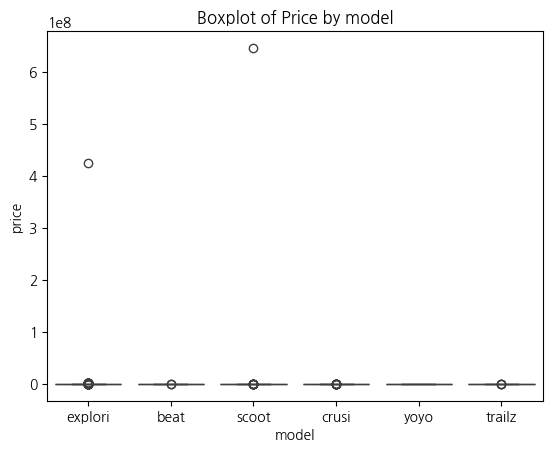

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

sns.boxplot(x="model", y="price", data=df)
plt.title("Boxplot of Price by model")
plt.show()

## 가격 이상치

In [53]:
for idx, row in df[df["price"] < 100000][['title', 'price']].iterrows():
    print(row["title"], row["price"])

[가격내림] 스토케 스쿠트 유모차 20000.0
(가격내림)스토케 크루시 디럭스 유모차 45000.0
가격최종/스토케 익스플로리V3 20000.0
(나눔)스토케 익스플로리 유모차 35000.0
디럭스유모차 스토케익스플로리v4 팝니다. 60000.0
디럭스유모차 스토케 (스쿠트 구형) 30000.0
디럭스유모차 스토케 익스플로리 v5 70000.0
디럭스 유모차 스토케 익스플로리 v3 25000.0
[디럭스 유모차] 스토케 크루시 70000.0
<마지막 가격 내림> 스토케 유모차 비트 블랙 한정판 팝니다! 90000.0
마지막/스토케스쿠트 스토케유모차 절충형유모차 37000.0
(미개봉/새제품) 스토케 요요 백팩(유모차 가방) 55000.0
(미개봉) 스토케 요요 유모차 백팩 판매 색상 블랙 35000.0
(미사용 새제품) 베이비젠 요요백 유모차 가방 페퍼민트 (후크 없음) 반값택배비 포함 15000.0
상태좋은 스토케 스쿠트 악세사리 일체 포함 80000.0
[새상품] 스토케 유모차 요요 yoyo 컬러팩 60000.0
스토케디럭스유모차+유모차용품 80000.0
스토케비트 유모차 37000.0
스토케비트 절충형유모차 50000.0
스토케비트 절충형유모차 50000.0
스토케스쿠트절충형 유모차 35000.0
스토케스쿠트 드림합니다 25000.0
스토케스쿠트+유모차연결의자 50000.0
스토케스쿠트 유모차 판매 55000.0
스토케스쿠트 유모차 1000.0
스토케스쿠트 유모차 11000.0
스토케스쿠트 유모차 5000.0
스토케스쿠트 유모차 20000.0
스토케스쿠트 유모차 20000.0
스토케스쿠트 유모차 30000.0
스토케스쿠트 유모차 70000.0
스토케스쿠트 유모차 50000.0
스토케스쿠트 유모차 30000.0
스토케스쿠트 절충형유모차 50000.0
스토케스쿠트 절충형 유모차 5000.0
스토케스쿠트(절충형 유모차) 15000.0
스토케스쿠트 절충형 4000.0
스토케스쿠트(19년도 구매제품) 90000.0
스토케스쿠트 50000.0
스토케썬쉐이드 260

In [48]:
df[df["price"] < 100000].count()

id               939
title            939
detail           939
condition         48
uploaded_date    939
is_completed     939
price            939
location         939
model            939
model_type       393
dtype: int64

## 급처분 상품

In [ ]:
has_fast = df['title'].str.contains('급처', na=False, case=False) | df['detail'].str.contains('급처', na=False, case=False)
df[has_fast].count()

id               16
title            16
detail           16
condition         1
uploaded_date    16
is_completed     16
price            16
location         16
model            16
model_type        6
dtype: int64

In [52]:
df = df[~has_fast]

## 최종 저장

In [32]:
df.to_csv(csv_path, index=0)